In [ ]:
#import the relevant libraries
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from scipy import ndimage
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from keras.regularizers import l2
import time
import tarfile
import pickle
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Extracting the tar file
tar = tarfile.open("/content/drive/MyDrive/cifar-10-python (1).tar.gz", "r:gz")
tar.extractall('/content/drive/MyDrive') # specify which folder to extract to
tar.close()

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
#using data_batch_1 as the training set
#using data_batch_2 as the validation set
#using test_batch as teh validation set
train_images = unpickle("/content/drive/MyDrive/cifar-10-batches-py/data_batch_1")
valid_images = unpickle("/content/drive/MyDrive/cifar-10-batches-py/data_batch_2")
test_images = unpickle("/content/drive/MyDrive/cifar-10-batches-py/test_batch")
Y_Train = np.array(train_images[b'labels'])
X_Train = train_images[b'data']
Y_Valid = np.array(valid_images[b'labels'])
X_Valid = valid_images[b'data']
Y_Test = np.array(test_images[b'labels'])
X_Test = test_images[b'data']
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape
#Bringing the test and train into relevant shapes
#Shapes of train and test data sets

((10000, 3072), (10000,), (10000, 3072), (10000,))

**Sequential Model layers- **
1. Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons : Choosen the number of layers so have the best performance of the model
2. Add L2 regularization to all the layers.
3. Add one layer of dropout at the appropriate position and give reasons : Selected the optimum dropout between 10 to 40 percent.
4. Choose the appropriate activation function for all the layers.
Print the model summary.

**Model Compilation: -**
1. Compile the model with the appropriate loss function.
2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value : Choose the learning, as choosing high learning rate increased the noise and choosing very low learning rate slows down the model reaching the minimum
3. Use accuracy as a metric.

**Model Training**
1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu,  bias_regularizer=l2(0.01)), 
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

tik = time.time()
history=model.fit(X_Train, Y_Train, batch_size=1000, epochs=15,validation_data=(X_Valid,Y_Valid))
tok = time.time()
model.summary()
print(f"Processing Time = {(tok-tik)} Seconds")

Epoch 1/15
10/10 [==============================] - 9s 810ms/step - loss: 505.7039 - accuracy: 0.1026 - val_loss: 25.0181 - val_accuracy: 0.0983
Epoch 2/15
10/10 [==============================] - 8s 776ms/step - loss: 11.5644 - accuracy: 0.1126 - val_loss: 4.3730 - val_accuracy: 0.1195
Epoch 3/15
10/10 [==============================] - 8s 779ms/step - loss: 3.7777 - accuracy: 0.1315 - val_loss: 2.2981 - val_accuracy: 0.1838
Epoch 4/15
10/10 [==============================] - 8s 772ms/step - loss: 2.4406 - accuracy: 0.1537 - val_loss: 2.1296 - val_accuracy: 0.2174
Epoch 5/15
10/10 [==============================] - 7s 769ms/step - loss: 2.1965 - accuracy: 0.1999 - val_loss: 2.0519 - val_accuracy: 0.2443
Epoch 6/15
10/10 [==============================] - 8s 773ms/step - loss: 2.0885 - accuracy: 0.2360 - val_loss: 1.9852 - val_accuracy: 0.2737
Epoch 7/15
10/10 [==============================] - 8s 770ms/step - loss: 2.0109 - accuracy: 0.2662 - val_loss: 1.9157 - val_accuracy: 0.3099
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


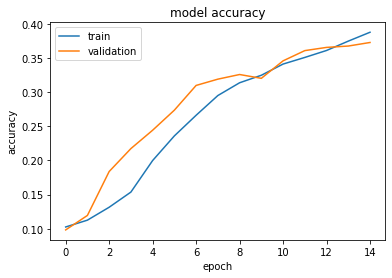

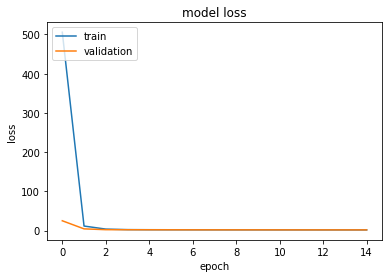

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(X_Test), axis=-1)

In [ ]:
eval_model=model.evaluate(X_Train,Y_Train)

313/313 [==============================] - 6s 19ms/step - loss: 1.6140 - accuracy: 0.4226


In [ ]:
print(f"Loss & Accuracy of the model built : {eval_model}\n")
cm = confusion_matrix(Y_Test, y_pred)
print(f"Confusion Matrix\n {cm}")

print(f" Accuracy Score: {accuracy_score(Y_Test, y_pred)}\n")

Loss & Accuracy of the model built : [1.6140068769454956, 0.42260000109672546]

Confusion Matrix
 [[337  37 126  48  27  16  36  38 303  32]
 [ 34 450  50  54  17  26  51  24 168 126]
 [100  19 313  94 154  49 146  49  58  18]
 [ 21  42 117 234  76 152 206  46  47  59]
 [ 45  24 228  74 289  38 174  60  50  18]
 [ 18  19 130 183  80 264 196  49  41  20]
 [  4  25 142  95  89  49 539  18  17  22]
 [ 34  31 116  85 108  78 117 319  54  58]
 [ 70  78  33  40  23  31  14  23 645  43]
 [ 38 194  26  56  20  20  61  47 221 317]]
 Accuracy Score: 0.3707



**Model Evaluation **
1. Print the final train and validation loss and accuracy. 
2. Print confusion matrix and classification report for the validation dataset. 
3. Analyse and report the best and worst performing class.
4. Print the two most incorrectly classified images for each class in the test dataset.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Class 0','Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6', 'Class 7', 'Class 8','Class 9']
print(classification_report(Y_Test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.48      0.34      0.40      1000
     Class 1       0.49      0.45      0.47      1000
     Class 2       0.24      0.31      0.27      1000
     Class 3       0.24      0.23      0.24      1000
     Class 4       0.33      0.29      0.31      1000
     Class 5       0.37      0.26      0.31      1000
     Class 6       0.35      0.54      0.42      1000
     Class 7       0.47      0.32      0.38      1000
     Class 8       0.40      0.65      0.50      1000
     Class 9       0.44      0.32      0.37      1000

    accuracy                           0.37     10000
   macro avg       0.38      0.37      0.37     10000
weighted avg       0.38      0.37      0.37     10000



Two most incorrectly classifed classes are Class 3 (cat) and class 2 (bird)

In [ ]:
#Hyperparameter testing - Batch Size
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu,  bias_regularizer=l2(0.01)), 
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

tik = time.time()
history=model.fit(X_Train, Y_Train, batch_size=2000, epochs=15,validation_data=(X_Valid,Y_Valid))
tok = time.time()
model.summary()
print(f"Processing Time = {(tok-tik)} Seconds")

Epoch 1/15
5/5 [==============================] - 8s 2s/step - loss: 1071.9325 - accuracy: 0.1038 - val_loss: 310.3861 - val_accuracy: 0.0987
Epoch 2/15
5/5 [==============================] - 7s 2s/step - loss: 152.6902 - accuracy: 0.0998 - val_loss: 34.4431 - val_accuracy: 0.1146
Epoch 3/15
5/5 [==============================] - 7s 2s/step - loss: 22.4449 - accuracy: 0.1087 - val_loss: 8.6672 - val_accuracy: 0.1034
Epoch 4/15
5/5 [==============================] - 7s 2s/step - loss: 5.6194 - accuracy: 0.1100 - val_loss: 4.5591 - val_accuracy: 0.1027
Epoch 5/15
5/5 [==============================] - 7s 2s/step - loss: 3.7345 - accuracy: 0.1171 - val_loss: 3.1663 - val_accuracy: 0.1449
Epoch 6/15
5/5 [==============================] - 7s 2s/step - loss: 2.8840 - accuracy: 0.1419 - val_loss: 2.4840 - val_accuracy: 0.1195
Epoch 7/15
5/5 [==============================] - 7s 2s/step - loss: 2.4763 - accuracy: 0.1397 - val_loss: 2.2068 - val_accuracy: 0.1809
Epoch 8/15
5/5 [================

In [ ]:
#Hyperparameter Testing -Changing optimizer
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu,  bias_regularizer=l2(0.01)), 
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dropout(.2),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dense(1280, activation = tf.nn.relu, bias_regularizer=l2(0.01)),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.RMSprop(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

tik = time.time()
history=model.fit(X_Train, Y_Train, batch_size=1000, epochs=15,validation_data=(X_Valid,Y_Valid))
tok = time.time()
model.summary()
print(f"Processing Time = {(tok-tik)} Seconds")

Epoch 1/15
10/10 [==============================] - 9s 827ms/step - loss: 4011.6448 - accuracy: 0.1012 - val_loss: 19.3154 - val_accuracy: 0.1004
Epoch 2/15
10/10 [==============================] - 8s 809ms/step - loss: 8.4034 - accuracy: 0.1261 - val_loss: 3.2666 - val_accuracy: 0.1018
Epoch 3/15
10/10 [==============================] - 8s 808ms/step - loss: 3.0209 - accuracy: 0.1405 - val_loss: 2.3941 - val_accuracy: 0.1221
Epoch 4/15
10/10 [==============================] - 8s 812ms/step - loss: 2.5292 - accuracy: 0.1519 - val_loss: 2.2802 - val_accuracy: 0.1198
Epoch 5/15
10/10 [==============================] - 8s 810ms/step - loss: 2.4172 - accuracy: 0.1537 - val_loss: 2.3736 - val_accuracy: 0.1077
Epoch 6/15
10/10 [==============================] - 8s 807ms/step - loss: 2.3494 - accuracy: 0.1737 - val_loss: 2.3125 - val_accuracy: 0.1665
Epoch 7/15
10/10 [==============================] - 8s 807ms/step - loss: 32.2006 - accuracy: 0.1119 - val_loss: 6.0161 - val_accuracy: 0.0990
E

Changing the batch size to 2000 and changing the optimizer to RMSprop - the accruacy decreased drastically. As the batch size increased the probility of variance increased and hence the accuracy. RMS prop has faster trajectory in the initial iterations compared to ADAM as it uses only squares of derrivate of loss.